# Homework 2

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import mlflow

## Question 1

mlflow is already pre-installed in the environment I created for the second week of the course. I only need to check the version. 

In [4]:
!mlflow --version

mlflow, version 2.13.0


## Question 2

In [5]:
!python preprocess_data.py --raw_data_path ./data/ --dest_path ./output

In [10]:
import os, os.path

print(len([name for name in os.listdir('./output') if os.path.isfile(os.path.join('./output', name))]), "files were added to the output folder.")

4 files were added to the output folder.


## Question 3

In [32]:
!python train.py --data_path ./output

Traceback (most recent call last):
  File "/workspaces/mlops-zoomcamp/02-experiment-tracking/train.py", line 39, in <module>
    run_train()
  File "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/workspaces/mlops-zoomcamp/02-experiment-tracking/train.py", line 27, in run_train
    with mlflow.start_run():
  File "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/mlflow/tracking/fl

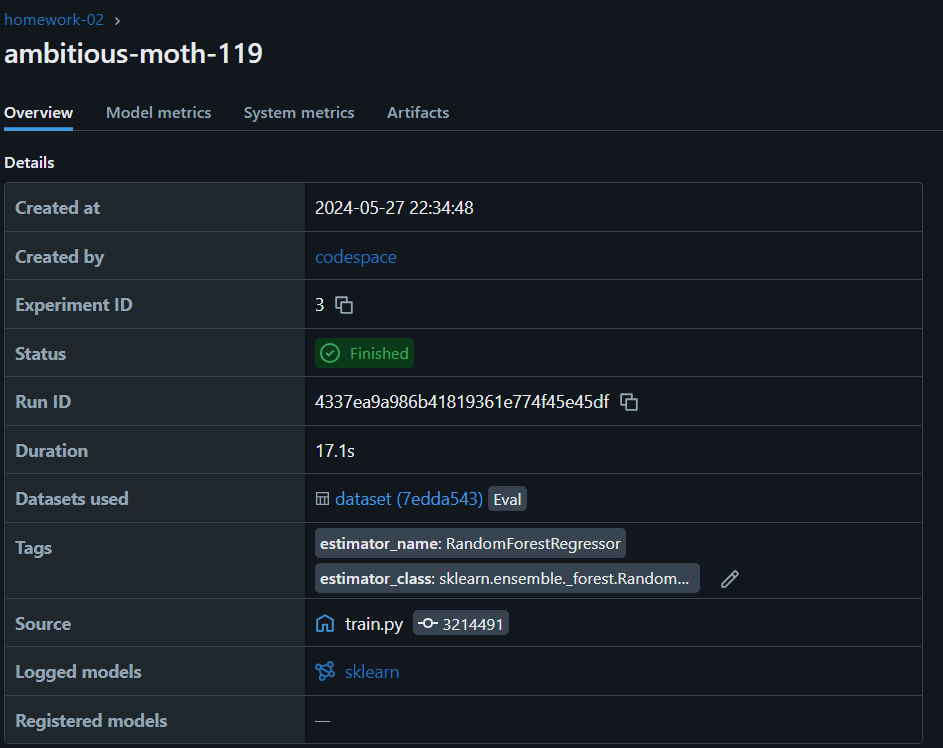

In [24]:
logged_model = 'runs:/4337ea9a986b41819361e774f45e45df/model'
loaded_model = mlflow.sklearn.load_model(logged_model)

In [29]:
print("The value of min_samples_split is:", loaded_model.get_params()['min_samples_split'])

The value of min_samples_split is: 2


## Question 4

I need to set default-artifact-root to artifacts to properly configure the server. 

## Question 5

In [40]:
!python hpo.py 

  0%|                                    | 0/15 [00:00<?, ?trial/s, best loss=?]/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

  7%|▋          | 1/15 [00:07<01:46,  7.61s/trial, best loss: 5.370086069268862]/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

 13%|█▍         | 2/15 [00:08<00:44,  3.43s/trial, best loss: 5.370086069268862]/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 

The best RMSE obtained is 5.335419588556921.

## Question 6

In [50]:
!python register_model.py

2024/05/27 21:49:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/27 21:49:41 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 21:49:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
/home/codespace/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/anaconda3/envs/exp-tracki

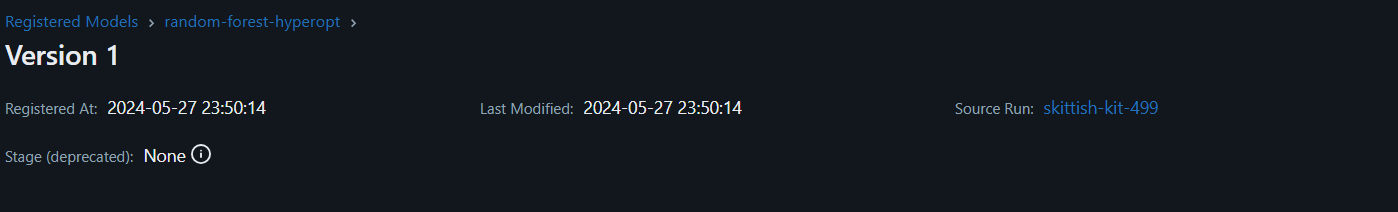

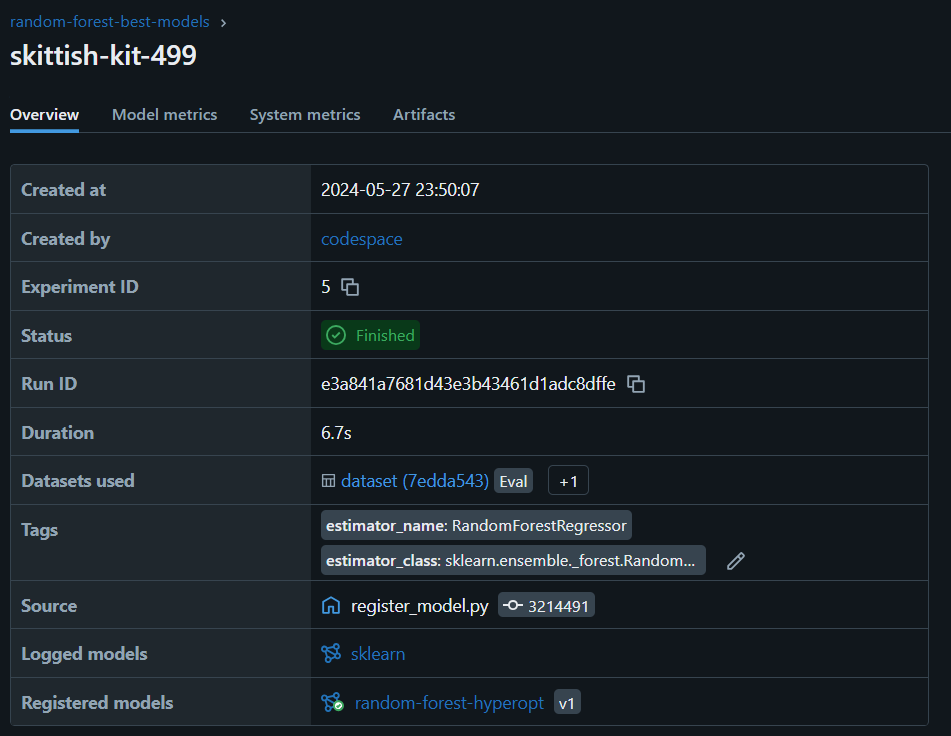

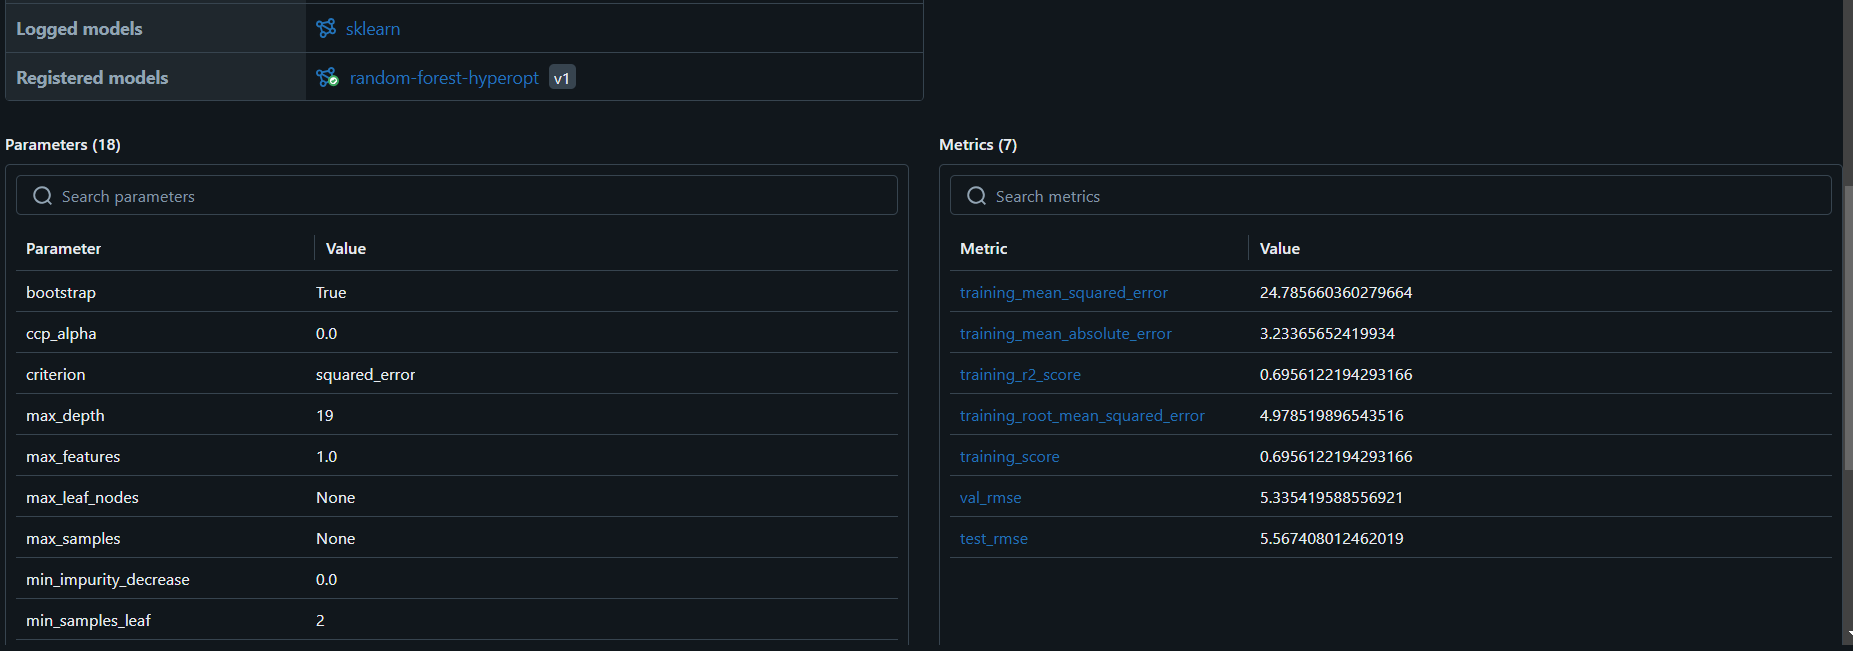

The best test RMSE is 5.567408012462019.